In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [52]:
# Load the dataset
insurance_df = pd.read_csv("insurance.xls")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'])

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [55]:
print("Number of samples: ", df.shape[0])
print("Number of attributes: ", df.shape[1])

Number of samples:  1338
Number of attributes:  12


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


### **Data Visualization**

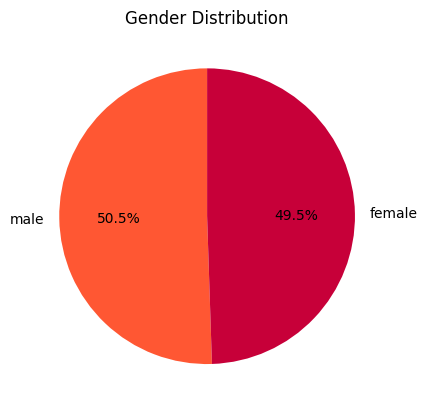

In [57]:
colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#FFC300']

# pie chart
fig, ax = plt.subplots()
ax.pie(insurance_df['sex'].value_counts().values, labels=insurance_df['sex'].value_counts().index, 
       autopct='%1.1f%%', startangle=90, colors = colors)

# title
ax.set_title('Gender Distribution')

# Show the plot
plt.show()

**Explanation:** The data is almost equally distributed for both gender categories; male and Female.

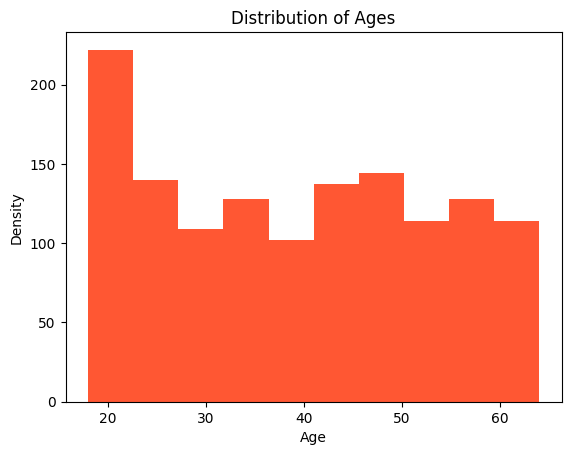

In [58]:
# ensity plot of ages
plt.hist(insurance_df['age'], color=colors[0])

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')

# Show the plot
plt.show()

**Explanation:** According to this plot, the age is normally distributed throughtout the dataset. Therefore no skewness of particular age range is observed. Comparatively, there are more samples with age less than 30.

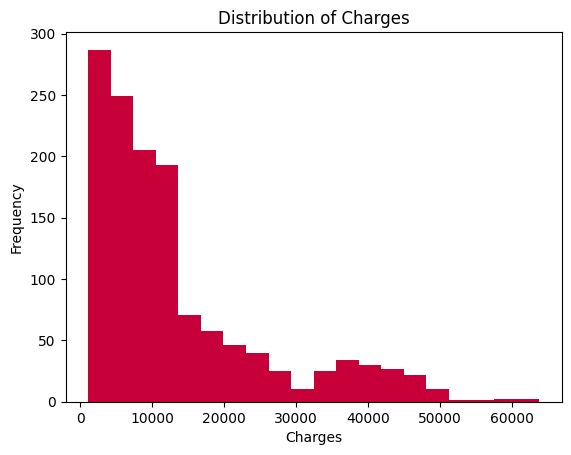

In [59]:
# visualizing target data
plt.hist(insurance_df["charges"], bins=20, color=colors[1])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Charges")
plt.show()

**Explanation:** The data contains more sample observation with lower charges mainly ranging from 2000-120000 (majorly). Higher charges observations are lesser in number.

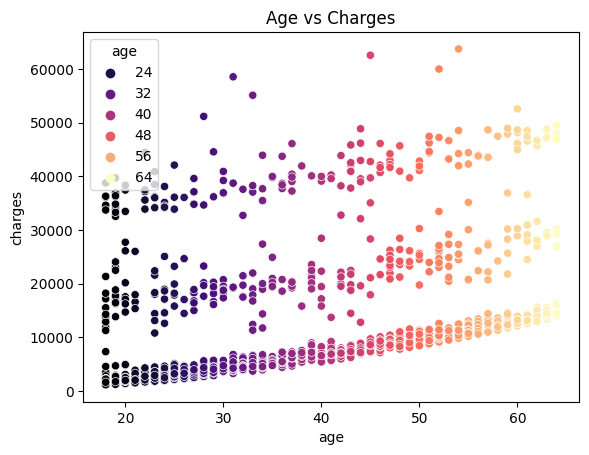

In [60]:
import seaborn as sns

# Scatter plot of age and charges
sns.scatterplot(x="age", y="charges", data=insurance_df, hue="age", palette="magma")
plt.title("Age vs Charges")
plt.show()

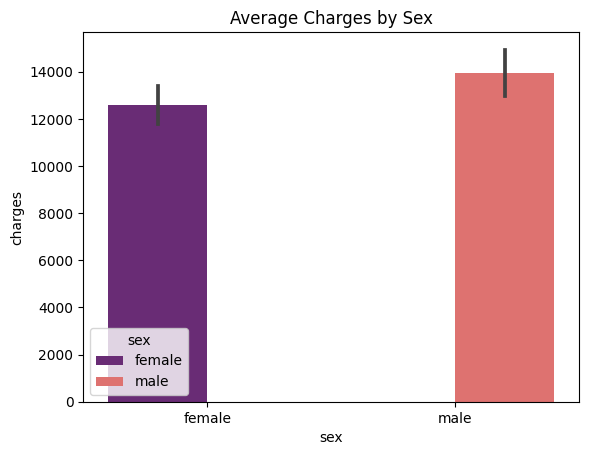

In [61]:
# Bar plot of average charges by sex
sns.barplot(x="sex", y="charges", data=insurance_df, hue="sex", palette="magma")
plt.title("Average Charges by Sex")
plt.show()

**Explanation:** t suggests that there are more male patients in the dataset than female patients. 

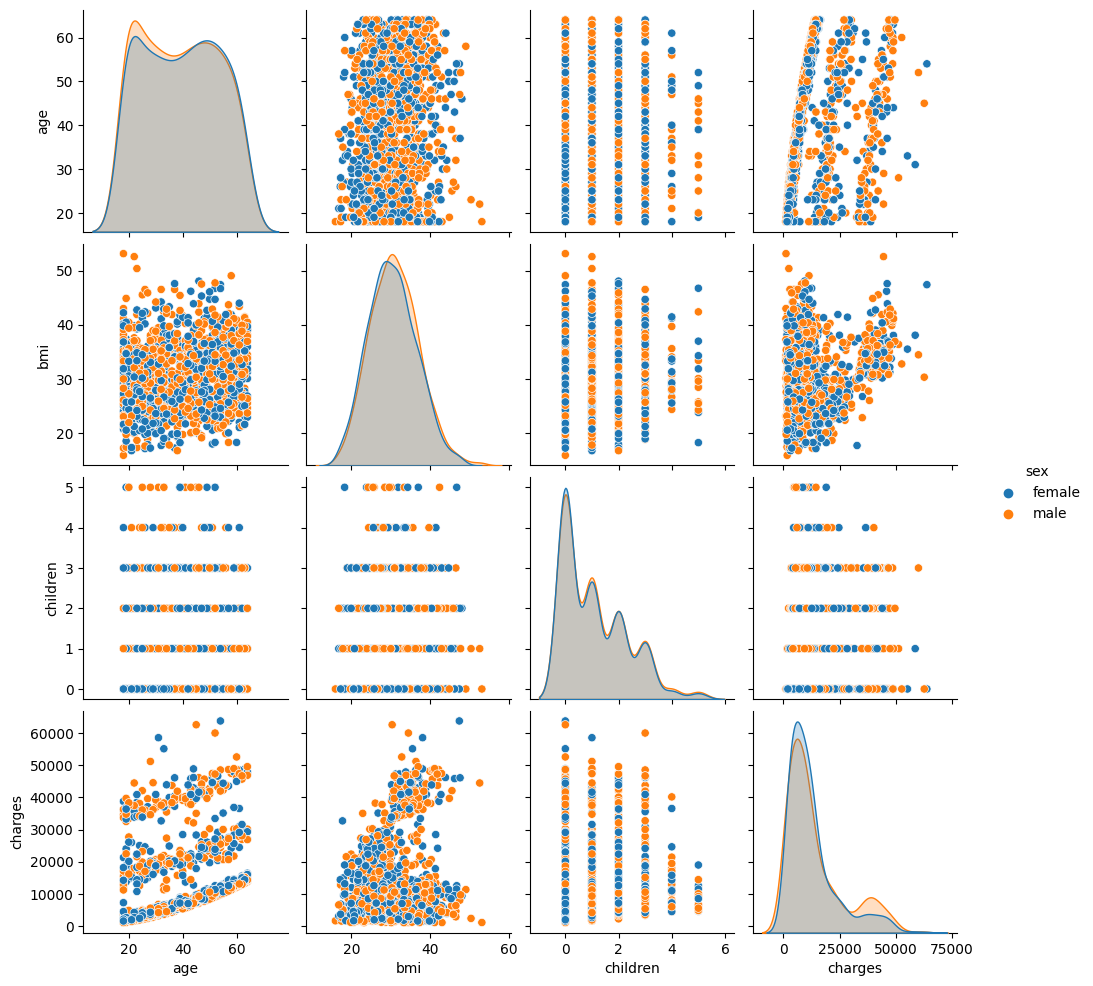

In [62]:
# Pairplot of all numerical columns
sns.pairplot(insurance_df, hue='sex')
plt.show()

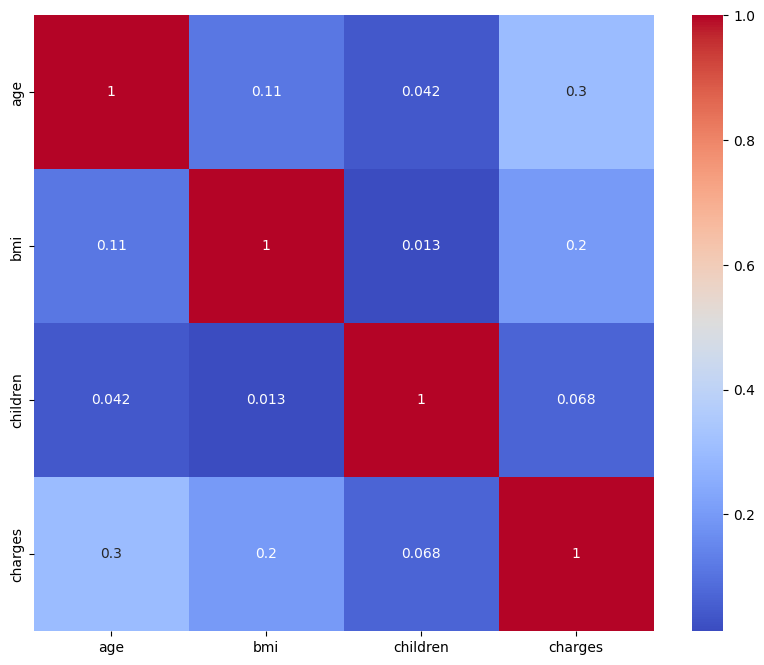

In [63]:
# heatmap for feature analysis
corr_matrix = insurance_df.corr()

plt.figure(figsize=(10,8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [64]:
print("Correlation among features:")
corr_matrix

Correlation among features:


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Explanation:** In this matrix, we can see that the age column has a positive correlation with charges, with a correlation coefficient of 0.299. This indicates that as the age of the patient increases, the charges for their insurance tend to increase as well. Similarly, we can see that the bmi column also has a positive correlation with charges, with a correlation coefficient of 0.198. This suggests that patients with a higher BMI tend to have higher insurance charges.

On the other hand, we can see that the children column has a weak positive correlation with charges, with a correlation coefficient of 0.068. This indicates that having more children does not necessarily result in higher insurance charges.

### Data Splitting

In [65]:
# Split the dataset into training and testing sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#shape of features
X.shape

(1338, 11)

In [67]:
#shape of training features
X_train.shape

(1070, 11)

In [68]:
#shape of test features
X_test.shape

(268, 11)

In [69]:
#shape of training label
y_train.shape

(1070,)

In [70]:
#shape of test label
y_test.shape

(268,)

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Decision Tree**

In [72]:
from sklearn.tree import DecisionTreeRegressor

# Build a decision tree regression model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [73]:
# Predict on the testing set and compute evaluation metrics
y_pred = dt_reg.predict(X_test)
y_pred

array([ 9500.57305 ,  5266.3656  , 28950.4692  ,  9500.57305 ,
       33732.6867  , 11326.71487 ,  2709.24395 , 14410.9321  ,
        2974.126   , 30284.64294 , 19361.9988  ,  6710.1919  ,
        4151.0287  , 46200.9851  , 48173.361   , 48885.13561 ,
       10118.424   , 41676.0811  ,  8515.7587  , 21348.706   ,
        5615.369   ,  8520.026   ,  1253.936   ,  2741.948   ,
       10702.6424  , 11512.405   , 13635.6379  ,  4618.0799  ,
        9447.25035 , 16586.49771 ,  7954.517   , 11840.77505 ,
       11482.63485 ,  5325.651   ,  3490.5491  ,  8342.90875 ,
        2007.945   ,  6849.026   , 24869.8368  , 37742.5757  ,
        4561.1885  ,  2639.0429  , 10713.644   , 12523.6048  ,
        5124.1887  , 12913.9924  , 26018.95052 ,  5312.16985 ,
       40273.6455  ,  4673.3922  , 13887.9685  ,  1720.3537  ,
        6393.60345 ,  1708.0014  , 20781.48892 ,  9290.1395  ,
        3268.84665 , 58571.07448 , 10704.47    , 11512.405   ,
       13393.756   ,  4949.7587  , 15170.069   ,  7201.

#### Evaluation metrics

In [74]:
dt_r2 = r2_score(y_test, y_pred)
dt_exp = explained_variance_score(y_test, y_pred)
dt_mse =  mean_squared_error(y_test, y_pred)

print('Decision Tree regressor evaluation metrics: \n')


print('R-squared score:', dt_r2, "\n")
print('Explained Variance score:',dt_exp, "\n")
print('Mean squared error:', dt_mse, "\n")

Decision Tree regressor evaluation metrics: 

R-squared score: 0.7553500495404961 

Explained Variance score: 0.7581508039281912 

Mean squared error: 37981594.4683632 



#### Feature Importance

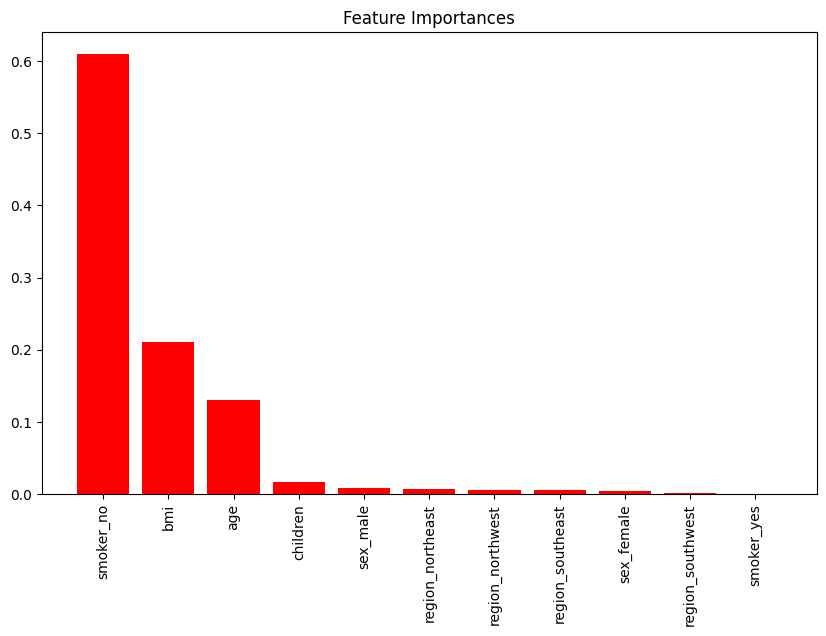

In [75]:
# feature importances from the model
importances = dt_reg.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# names of the features
feature_names = X.columns

# barplot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color="Red")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


As per the observations, the smoker feature seems to be the most useful feature for predicting the accuracte charges.Therefore, smoker is ranked highly for predicting the charges of insurance.

### **Decision Tree (with Hyperparameter Tuning)**

In [76]:
# model
dt_reg_tuned = DecisionTreeRegressor()

In [77]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(dt_reg_tuned, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [78]:
# Get best hyperparameters and fit model
best_params = grid_search.best_params_
dt_reg_tuned.set_params(**best_params)


dt_reg_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto')

In [79]:
# predictions on testing data and evaluate model
y_pred = dt_reg_tuned.predict(X_test)

y_pred

array([10406.77138662,  6350.82542396, 24994.45073048, 10406.77138662,
       36691.43242488,  6350.82542396,  3364.76173199, 13752.28669534,
        6350.82542396, 10406.77138662, 18348.12366238,  6350.82542396,
        6350.82542396, 44518.21578375, 44518.21578375, 44518.21578375,
       10406.77138662, 44518.21578375, 10406.77138662, 24994.45073048,
        6350.82542396, 10406.77138662,  3364.76173199,  3364.76173199,
       10406.77138662, 13752.28669534, 13752.28669534,  6350.82542396,
       10406.77138662,  3364.76173199,  6350.82542396, 13752.28669534,
        3364.76173199,  6350.82542396,  6350.82542396, 10406.77138662,
        3364.76173199, 10406.77138662, 24994.45073048, 44518.21578375,
        3364.76173199,  3364.76173199, 13752.28669534, 13752.28669534,
        6350.82542396, 13752.28669534,  3364.76173199,  6350.82542396,
       44518.21578375,  6350.82542396, 13752.28669534,  3364.76173199,
        6350.82542396,  3364.76173199, 13752.28669534, 10406.77138662,
      

#### Evaluation metrics

In [80]:
print('Decision Tree regressor evaluation metrics with tuning: \n')

dt_tuned_r2 = r2_score(y_test, y_pred)
dt_tuned_exp = explained_variance_score(y_test, y_pred)
dt_tuned_mse =  mean_squared_error(y_test, y_pred)


print('R-squared score:', dt_tuned_r2, "\n")
print('Explained Variance score:', dt_tuned_exp, "\n")
print('Mean squared error:', dt_tuned_mse, "\n")

Decision Tree regressor evaluation metrics with tuning: 

R-squared score: 0.8530572866320028 

Explained Variance score: 0.8537478329155076 

Mean squared error: 22812669.852340847 



### **Random Forest**

In [81]:
# Build a random forest regression model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
# Predict on the testing set and compute evaluation metrics
y_pred = rf_reg.predict(X_test)
y_pred

array([ 9980.7094791 ,  5373.7392295 , 28138.3067755 , 12684.4460761 ,
       34691.7402925 ,  8405.4863926 ,  2081.6450435 , 14569.8628859 ,
        6042.8056343 , 10872.2269827 , 19706.1126698 ,  7228.3249035 ,
        4820.289632  , 46205.0770171 , 48416.1252305 , 45663.3584767 ,
        9759.2093945 , 43667.8885785 ,  9022.7299405 , 24110.0338016 ,
        6152.2196101 ,  9535.5322418 ,  1558.6980291 ,  2638.7393148 ,
       11592.0134871 , 12046.8739026 , 13361.524261  ,  6605.0647714 ,
       10503.7408627 ,  5629.0519306 ,  7715.080359  , 11748.927324  ,
        3103.0006969 ,  5730.9764294 ,  3501.5792798 , 10920.9281101 ,
        2757.97422   ,  8229.3885882 , 23625.5820825 , 39737.8529447 ,
        6148.8270928 ,  3075.6951449 , 12007.1190406 , 14657.2780463 ,
        5863.9824126 , 14926.9129733 , 15697.3281045 ,  6436.4401219 ,
       42198.7693672 ,  7269.7181395 , 13949.8017525 ,  2805.00910775,
        6844.005691  ,  1818.3526514 , 13350.6899403 , 10552.4562667 ,
      

#### Evaluation metrics

In [83]:
rf_r2 = r2_score(y_test, y_pred)
rf_exp = explained_variance_score(y_test, y_pred)
rf_mse =  mean_squared_error(y_test, y_pred)

print('Random forest regressor evaluation metrics: \n')


print('R-squared score:', rf_r2, "\n")
print('Explained Variance score:',rf_exp, "\n")
print('Mean squared error:', rf_mse, "\n")

Random forest regressor evaluation metrics: 

R-squared score: 0.864399297096109 

Explained Variance score: 0.8657836206163444 

Mean squared error: 21051837.115221933 



#### Feature Importance

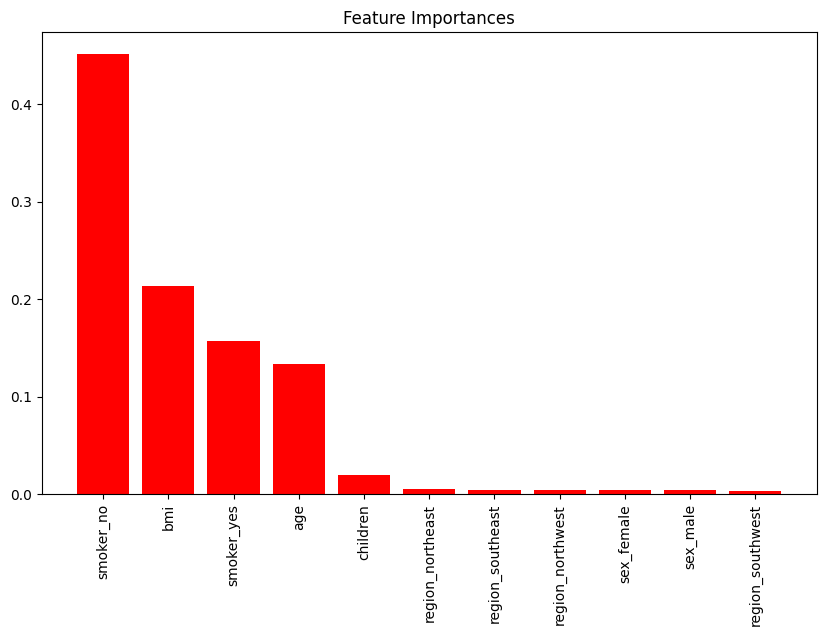

In [84]:
# feature importances from the model
importances = rf_reg.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# names of the features
feature_names = X.columns

# barplot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color="Red")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


As per the observations, the smoker feature seems to be the most useful feature for predicting the accuracte charges. Other than smoker feature, the bmi attribute is also found to be helpful. Therefore, both are ranked highly for predicting the charges of insurance.

### **Random Forest (with Hyperparameter Tuning)**

In [85]:
# model
rf_reg_tuned = RandomForestRegressor()

In [86]:
# hyperparameters to be tuned
param_grid = {
              'n_estimators': [3,5,7,10,20],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 7],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]
          }


# GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(rf_reg_tuned, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [3, 5, 7, 10, 20]})

In [87]:
# Get best hyperparameters and fit model
best_params = grid_search.best_params_
rf_reg_tuned.set_params(**best_params)


rf_reg_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=20)

In [88]:
# predictions on testing data and evaluate model
y_pred = rf_reg_tuned.predict(X_test)

y_pred

array([10927.06822638,  5891.6325719 , 26846.98481712, 11290.80271482,
       36518.37446279,  7565.24994209,  3489.38968269, 14489.81845347,
        5656.16377041, 12164.97602238, 20159.64268904,  7313.76328556,
        4356.12122643, 44532.31382035, 47752.99785783, 42354.37274464,
        9632.57859251, 44319.5731804 ,  8887.06853929, 24092.08062987,
        4987.73967736,  7969.06443411,  2397.25438242,  4805.5268421 ,
       11991.74922648, 12663.57134978, 13351.4193746 ,  6901.29821787,
       11298.39309802,  3637.24600788,  7114.11267405, 12123.79607313,
        3647.33474549,  7001.45120642,  4196.59246768, 10323.90639163,
        4291.72515627,  7445.69622177, 23872.2212974 , 37908.61080788,
        4715.37033836,  4508.81614531, 12130.58486669, 12836.89004199,
        7132.40635081, 11772.67404438, 15177.09567814,  5418.86356711,
       40855.75159092,  7106.00859733, 14470.13724591,  2682.82855292,
        6539.01705348,  2405.04790397, 12645.93276577, 11710.05920389,
      

#### Evaluation metrics

In [89]:
print('Random Forest regressor evaluation metrics with tuning: \n')

rf_tuned_r2 = r2_score(y_test, y_pred)
rf_tuned_exp = explained_variance_score(y_test, y_pred)
rf_tuned_mse =  mean_squared_error(y_test, y_pred)


print('R-squared score:', rf_tuned_r2, "\n")
print('Explained Variance score:', rf_tuned_exp, "\n")
print('Mean squared error:', rf_tuned_mse, "\n")

Random Forest regressor evaluation metrics with tuning: 

R-squared score: 0.862601539489324 

Explained Variance score: 0.8627426672118417 

Mean squared error: 21330936.703204967 



### **Comparative Study**

#### Models with No Tuning

([0, 1], [Text(0, 0, 'Decision Tree'), Text(1, 0, 'Random Forest')])

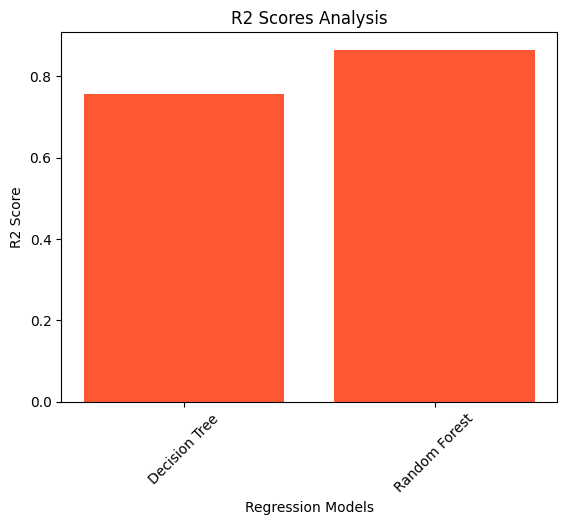

In [90]:
### comparison of normal models
models = ["Decision Tree", "Random Forest"]
r2_scores = [dt_r2, rf_r2]


plt.bar(models, r2_scores, color=colors[0])
plt.title("R2 Scores Analysis")
plt.xlabel("Regression Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)

Random Forest is outperfoming with greater R2 Score

([0, 1], [Text(0, 0, 'Decision Tree'), Text(1, 0, 'Random Forest')])

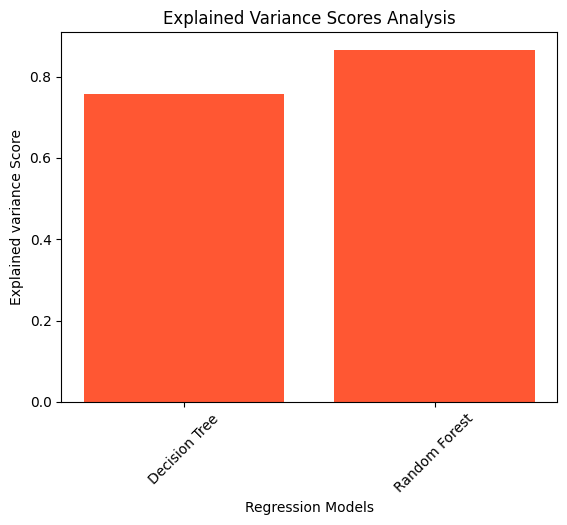

In [91]:
models = ["Decision Tree", "Random Forest"]
explained_scores = [dt_exp, rf_exp]


plt.bar(models, explained_scores, color=colors[0])
plt.title("Explained Variance Scores Analysis")
plt.xlabel("Regression Models")
plt.ylabel("Explained variance Score")
plt.xticks(rotation=45)

Random Forest is outperfoming with greater expalined variance Score

([0, 1], [Text(0, 0, 'Decision Tree'), Text(1, 0, 'Random Forest')])

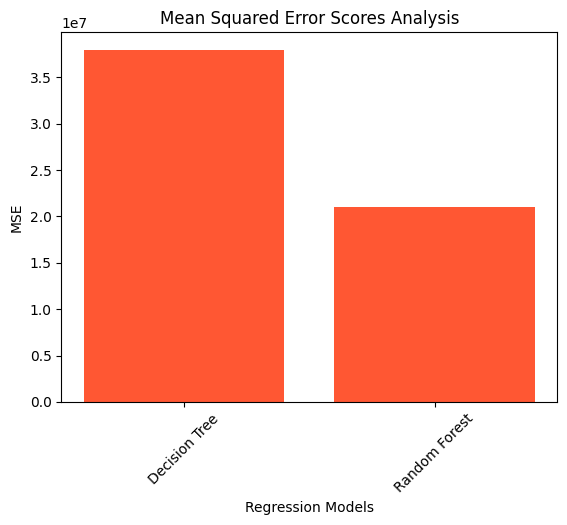

In [92]:
models = ["Decision Tree", "Random Forest"]
mse_scores = [dt_mse, rf_mse]


plt.bar(models, mse_scores, color=colors[0])
plt.title("Mean Squared Error Scores Analysis")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
plt.xticks(rotation=45)

Random Forest is outperfoming with least MSE Score.



#### Models with Hyperparameter Tuning

([0, 1], [Text(0, 0, 'Decision Tree'), Text(1, 0, 'Random Forest')])

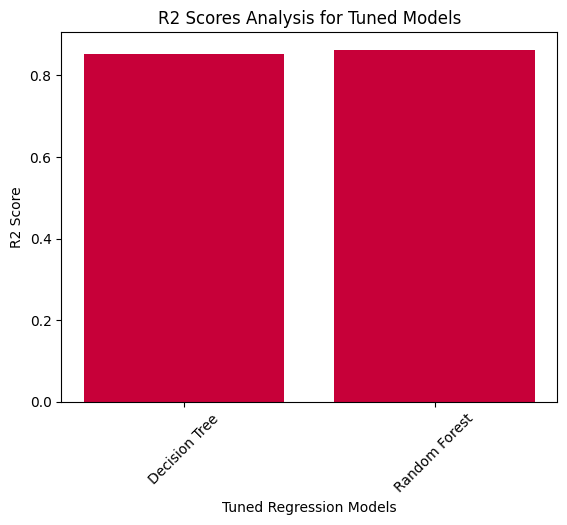

In [93]:
### comparison of normal models
models = ["Decision Tree", "Random Forest"]
r2_scores = [dt_tuned_r2, rf_tuned_r2]


plt.bar(models, r2_scores, color=colors[1])
plt.title("R2 Scores Analysis for Tuned Models")
plt.xlabel("Tuned Regression Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)

Random Forest is outperfoming with greater R2 Score

([0, 1], [Text(0, 0, 'Decision Tree'), Text(1, 0, 'Random Forest')])

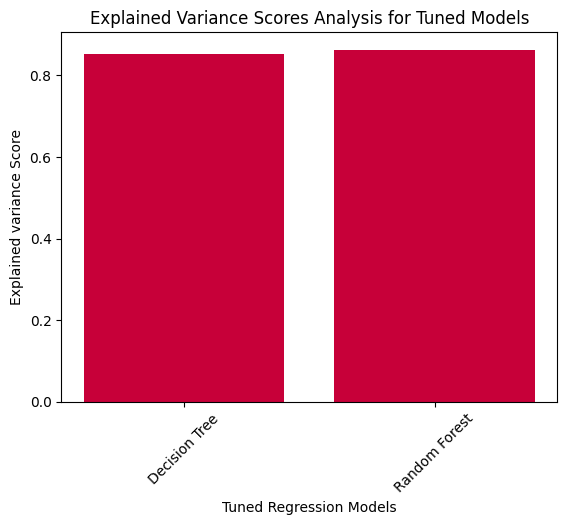

In [94]:
models = ["Decision Tree", "Random Forest"]
explained_scores = [dt_tuned_exp, rf_tuned_exp]


plt.bar(models, explained_scores, color=colors[1])
plt.title("Explained Variance Scores Analysis for Tuned Models")
plt.xlabel("Tuned Regression Models")
plt.ylabel("Explained variance Score")
plt.xticks(rotation=45)

Random Forest is outperfoming with greater explained variance even after tuning

([0, 1], [Text(0, 0, 'Decision Tree'), Text(1, 0, 'Random Forest')])

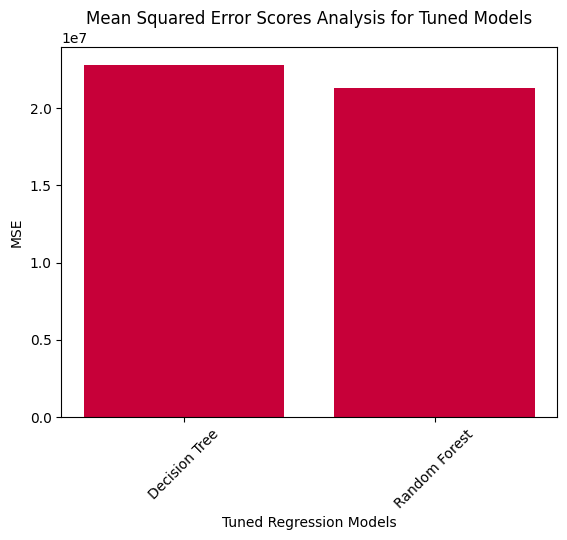

In [95]:
models = ["Decision Tree", "Random Forest"]
mse_scores = [dt_tuned_mse, rf_tuned_mse]


plt.bar(models, mse_scores, color=colors[1])
plt.title("Mean Squared Error Scores Analysis for Tuned Models")
plt.xlabel("Tuned Regression Models")
plt.ylabel("MSE")
plt.xticks(rotation=45)

Aftre tuning, Decision Tree is improved with still RF is best with least MSE

In [96]:
overall_performance = pd.DataFrame(columns = ["r2", "explained_varaince", "mse"])
overall_performance['r2'] = [dt_r2, rf_r2]
overall_performance['explained_varaince'] = [dt_exp, rf_exp]
overall_performance['mse'] = [dt_mse, rf_mse]
overall_performance.index = models


overall_performance

,r2,explained_varaince,mse
Decision Tree,0.755350,0.758151,3.798159e+07
Random Forest,0.864399,0.865784,2.105184e+07


In [97]:
overall_performance_tuned = pd.DataFrame(columns = ["r2", "explained_varaince", "mse"])
overall_performance_tuned['r2'] = [dt_tuned_r2, rf_tuned_r2]
overall_performance_tuned['explained_varaince'] = [dt_tuned_exp, rf_tuned_exp]
overall_performance_tuned['mse'] = [dt_tuned_mse, rf_tuned_mse]
overall_performance_tuned.index = models


overall_performance_tuned

,r2,explained_varaince,mse
Decision Tree,0.853057,0.853748,2.281267e+07
Random Forest,0.862602,0.862743,2.133094e+07


**Observation:**

We can see that the Random Forest model has the highest R-squared and explained variance values, indicating that it fits the data better than the other models. The Decision Tree model has the poor values for these metrics, indicating that it fits the data less well than the other models.

However, when we look at the mean squared error (MSE), we see that the Random Forest model also has the good value, indicating that its predictions are the closest to the actual values.

Hence, the Random Forest model appears to be the best-performing model between the two, as it has the highest R-squared and explained variance values and the lowest MSE value. The Decision Tree model performs worse between the two, with the lower R-squared and explained variance values and the higher MSE value.

## **Conclusion**

Comparing the two tables, we can see that the second table (models with hyperparameter tuning) generally perform better than the first table (models without hyperparameter tuning) for predicting insurance charges. This improvement in performance is due to the fact that hyperparameter tuning optimizes the models' parameters, which results in better performance.

Looking at the second table, we can see that the Random Forest model is the best-performing model for predicting insurance charges, as it has the highest R-squared and explained variance values and the lowest MSE value among the three models. The Decision Tree model performs relatively poor, with the lower R-squared and explained variance values and higher MSE value.

**Therefore, based on both tables, we can conclude that the Random Forest model is the best choice for predicting insurance charges, especially when its hyperparameters are optimized.**